In [2]:
import soundfile as sf
import sounddevice as sd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 1. Load audio file
file_path = "dudu.wav"  # Replace with your WAV file path
y, sr = librosa.load(file_path)


Duration: 8.45 seconds
[103.359375] [ 10  36  62  88 118 144 169 195 220 246 271 296 320 342]


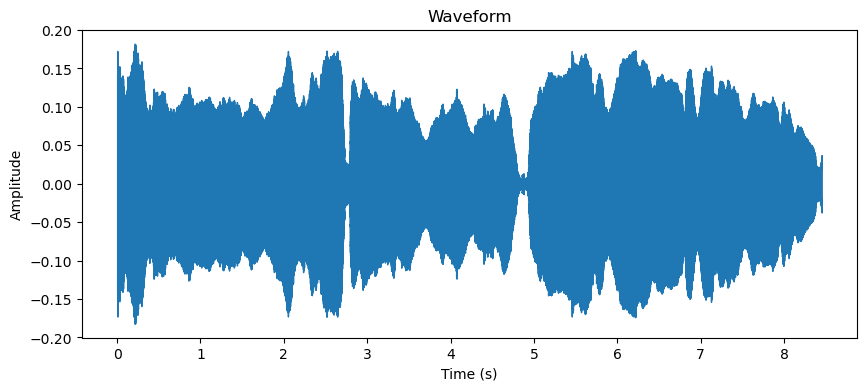

In [4]:
# 2. Basic analysis with Librosa
duration = librosa.get_duration(y=y, sr=sr)
print(f"Duration: {duration:.2f} seconds")

tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print( tempo, beats)

# 3. Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


[  6   8  11  14  21  33  37  43  48  54  59  71  74  82  84  89  98 101
 106 110 118 122 128 140 144 148 153 163 169 176 185 190 200 214 236 240
 245 248 258 268 282 295 304 312 314 320 330 336 345 356] [0.13931973 0.18575964 0.2554195  0.32507937 0.48761905 0.7662585
 0.85913832 0.99845805 1.11455782 1.25387755 1.36997732 1.64861678
 1.71827664 1.90403628 1.95047619 2.06657596 2.27555556 2.34521542
 2.46131519 2.55419501 2.73995465 2.83283447 2.9721542  3.25079365
 3.34367347 3.43655329 3.55265306 3.78485261 3.92417234 4.08671202
 4.29569161 4.41179138 4.64399093 4.96907029 5.4799093  5.57278912
 5.68888889 5.75854875 5.9907483  6.22294785 6.54802721 6.84988662
 7.05886621 7.24462585 7.29106576 7.43038549 7.66258503 7.80190476
 8.01088435 8.26630385]


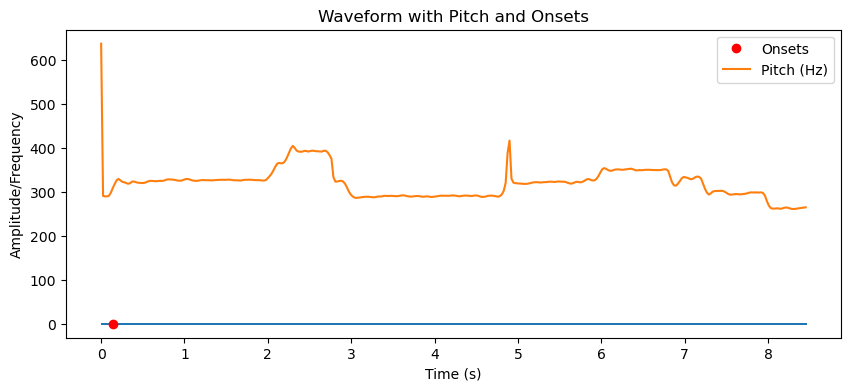

In [6]:
# 4. Pitch estimation and onset detection
f1 = librosa.yin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=sr)  # Adjust fmin/fmax if needed
f0 = f1[0]
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

onset_times = librosa.frames_to_time(onset_frames, sr=sr)
print(onset_frames, onset_times, )

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.plot(onset_times[0], np.max(np.abs(y)) * 1.1, 'ro', label='Onsets')  # Plot onsets
plt.plot(librosa.times_like(f1), f1, label='Pitch (Hz)') #plot pitch
plt.title("Waveform with Pitch and Onsets")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude/Frequency")
plt.legend()
plt.show()

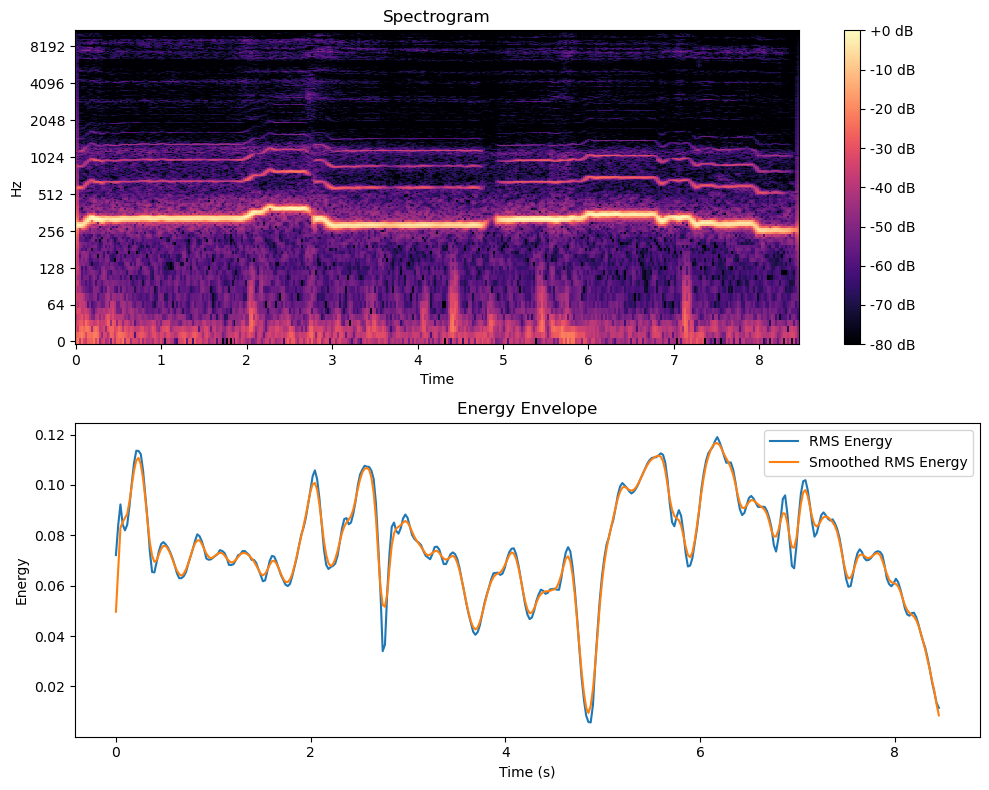

Analysis Complete.


In [8]:
# 5. Spectrogram and energy envelope analysis
stft = librosa.stft(y)
spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

# Energy envelope
hop_length = 512  # Adjust as needed
frame_length = 2048
rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
times = librosa.times_like(rms, sr=sr, hop_length=hop_length)
smoothed_rms = np.convolve(rms, np.ones(5)/5, mode='same') #smoothing the envelope

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)  # Spectrogram
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram")
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)  # Energy envelope
plt.plot(times, rms, label='RMS Energy')
plt.plot(times, smoothed_rms, label='Smoothed RMS Energy')
plt.title("Energy Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.legend()

plt.tight_layout()
plt.show()


print("Analysis Complete.")